This was a homework exercise using data on bike rentals as a study of time series analysis, guided by the following instructions:

● Assignment 4, Part 1: Data Exploration
o Read in bike_share_hour.csv as a pandas dataframe. The columns are
described in the bike_share_readme.txt if you need more information
about them.
o Look at the dataset, and convert the columns that are categorical to a
pandas “category” type.
o Look for non-null values in the dataset.
o Do a descriptive analysis of the numeric columns.
o Implement a bar plot of cnt versus season. Document which season has
the most bike rides and which season has the least.
o Implement a bar chart for working day versus count. Document how bike
rides are distributed across these two classes.
o Implement a bar chart for month versus count. Document which months
have the most bike rides.
o Implement code to figure out which months belong to which seasons.
o Implement a bar plot of weathersit versus cnt. Document which weather
situation has less bike rentals.
o Implement a point plot of weathersit on the x-axis, count on the y-axis, and
the season as the hue. Document how season and weathersit are related.
o Implement a bar plot of hour versus count. Are there any specific hours
that are busier than others?
o Implement a bar plot of hour versus count on weekends and holidays
(when workingday = 0). Does the hourly trend change on weekends?
● Assignment 4, Part 2: Data Preparation
o Implement and graph a correlation matrix with the remaining numeric
features. Any interesting relationships?
o Scale the numerical features using StandardScaler(), and replace the
original columns in your dataframe.
o Drop the following columns from your dataset: casual, registered, dteday,
instant.
o Implement a histogram of the count column. What can be said based on
the resulting distribution?
o Implement a train/test split with a test size of 33%.
o Implement a baseline linear regression algorithm. Use cross-validation to
output r2 and mse. Calculate RMSE base on mse. Document your scores.
● Assignment 4, Part 3: Model Training (Hint: trained all of these with a for loop
and added my results to a PrettyTable.)
o Create one-hot-encoded values for your categorical columns using
get_dummies and add them to your source dataset.
o Drop the original categorical columns from your source dataset.
o Do a test/train split based on your new source dataset. Implement and fit a
new linear model on your new training set.
o What are the new values for r2, mse, and rmse?
o Implement and score a decision tree regressor with random_state=0.
o Implement and score a RandomForestRegressor with random_state=0
and n_esitmators=30.
o Implement and score an SGDRegressor with max_iter=1000 and tol=1e3).
o Implement and score a Lasso Regressor with alpha=0.1.
o Implement and score an ElasticNet Regressor with random_state=0.
o Implement and score a Ridge Regressor with alpha=0.5.
o Implement and score a BaggingRegressor.
● Assignment 4, Part 4: Model Tuning
o Take the top three performing models and implement cross-validation on
them.
▪ Hint: They should be Decision Tree Regressor,
RandomForestRegressor, and BaggingRegressor.
o Take your top performing model (mine was the RandomForestRegressor)
and do a randomize search cv with 20 iterations and three folds.
▪ I found it is best to set your n_jobs = (# of cpu’s you have – 1). This
took about 10 minutes on my MacBook with 4 CPUs and 8 GB of
memory.
▪ Your param distributions should include the following:
● Bootstrap: true, false
● Max_depth: 10-110, number of bins 11
● Max_features: auto, sqrt
● Min_samples_split: 2,5,10
● Min_samples_leaf: 1,2,4
● 200 – 2000, number of bins 10
o Take your best_estimator_ and see how it compares by doing cross_vals
for r2, mse, and calculating rmse.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV



In [2]:
# Bigger cells for readability
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
display(HTML("<style>div.output_scroll {height: 80em; }</style>"))

# Part 1

In [3]:
'''	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter) (categorical)
	- yr : year (0: 2011, 1:2012) (binary, could be categorical)
	- mnth : month ( 1 to 12) (categorical)
	- hr : hour (0 to 23) (...arguably categorical? time of day rather than sequential hours)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule) (categorical)
	- weekday : day of the week (categorical), pretty sure 0 is sunday
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0. (categorical)
	+ weathersit : (categorical)
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered''';

In [4]:
# Reading in data
df = train = pd.read_csv("C:/JupyterNotebookStuff/bike_share_hour.csv")

In [5]:
# Encoding variables
cols = ['season','mnth','holiday','weekday','workingday','weathersit','hr','yr']
df[cols] = df[cols].astype('category')
df.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [6]:
# Interpretingt that as finding unique values, I guess?
df.nunique().to_frame().reset_index()

,index,0
0,instant,17379
1,dteday,731
2,season,4
3,yr,2
4,mnth,12
5,hr,24
6,holiday,2
7,weekday,7
8,workingday,2
9,weathersit,4


In [7]:
# recoding categorical data to make graphs easier to read
month_dict = {1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'}
season_dict = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
day_dict = {0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'}
weather_dict = {1: 'clear', 2: 'mist', 3: 'light_snow', 4: 'heavy_rain'} 
df_names = df.copy()
df_names['mnth'] = df['mnth'].replace(month_dict)
df_names['season'] = df['season'].replace(season_dict)
df_names['weekday'] = df['weekday'].replace(day_dict)
df_names['weathersit'] = df['weathersit'].replace(weather_dict)
df_names['workingday'] = df['workingday'].replace({0: 'no', 1: 'yes'})
df_names['holiday'] = df['holiday'].replace({0: 'no', 1: 'yes'})
df_names

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,jan,0,no,saturday,no,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,spring,0,jan,1,no,saturday,no,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,spring,0,jan,2,no,saturday,no,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,spring,0,jan,3,no,saturday,no,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,spring,0,jan,4,no,saturday,no,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,spring,1,dec,19,no,monday,yes,mist,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,spring,1,dec,20,no,monday,yes,mist,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,spring,1,dec,21,no,monday,yes,clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,spring,1,dec,22,no,monday,yes,clear,0.26,0.2727,0.56,0.1343,13,48,61


In [8]:
# General descriptive analysis
#profile = ProfileReport(df_names, title="Pandas Profile Report",explorative=True)
#profile

Most bikes rented in:  1061129  in  fall
Fewest bikes rented in:  471348  in  spring


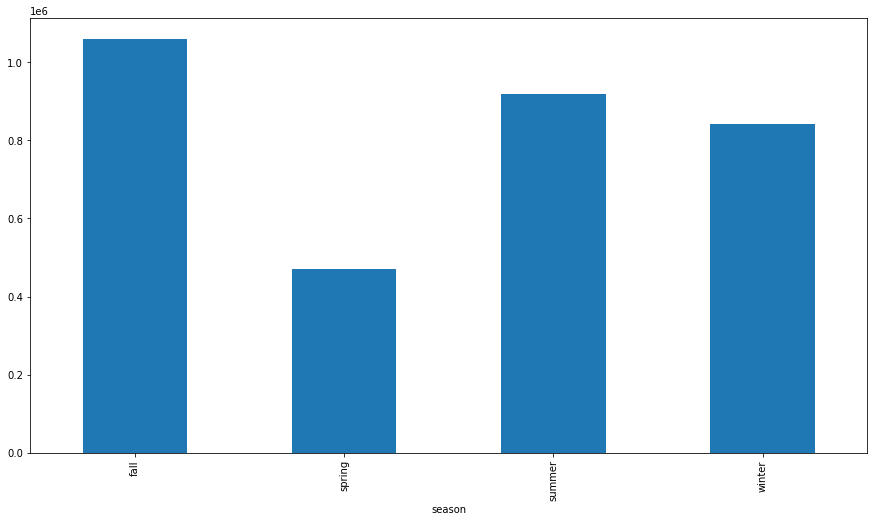

In [9]:
# seasonal graph
plt.figure(figsize = (15,8))
df_names.groupby('season').cnt.sum().plot(kind='bar');

print('Most bikes rented in: ', df_names.groupby(['season']).sum(['cnt'])['cnt'].max(), ' in ', df_names.groupby(['season']).sum(['cnt'])['cnt'].idxmax())
print('Fewest bikes rented in: ', df_names.groupby(['season']).sum(['cnt'])['cnt'].min(), ' in ', df_names.groupby(['season']).sum(['cnt'])['cnt'].idxmin())

Workdays sees more than twice as many bike rentals, presumably by commuters


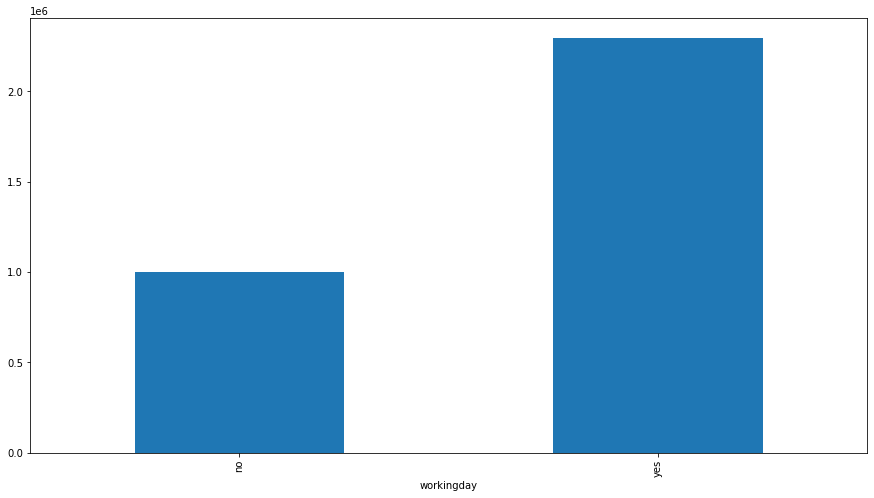

In [10]:
# working day graph
plt.figure(figsize = (15,8))
df_names.groupby('workingday').cnt.sum().plot(kind='bar');
print('Workdays sees more than twice as many bike rentals, presumably by commuters')

mnth
aug     351194
jun     346342
sept    345991
jul     344948
may     331686
oct     322352
apr     269094
nov     254831
mar     228920
dec     211036
feb     151352
jan     134933
Name: cnt, dtype: int64

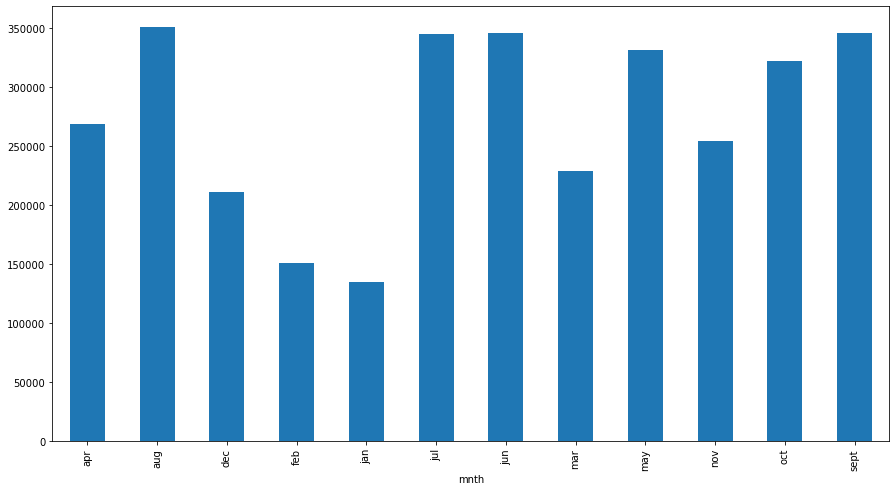

In [11]:
# month graph
plt.figure(figsize = (15,8))
df_names.groupby('mnth').cnt.sum().plot(kind='bar');
df_names.groupby('mnth').cnt.sum().sort_values(ascending=False)

In [12]:
print('The busiest months for bike rental are August, June, and September')

The busiest months for bike rental are August, June, and September


In [13]:
# months per season
df_names.groupby('season')['mnth'].unique()

season
fall      [jun, jul, aug, sept]
spring     [jan, feb, mar, dec]
summer     [mar, apr, may, jun]
winter    [sept, oct, nov, dec]
Name: mnth, dtype: object

weathersit
clear         2338173
mist           795952
light_snow     158331
heavy_rain        223
Name: cnt, dtype: int64

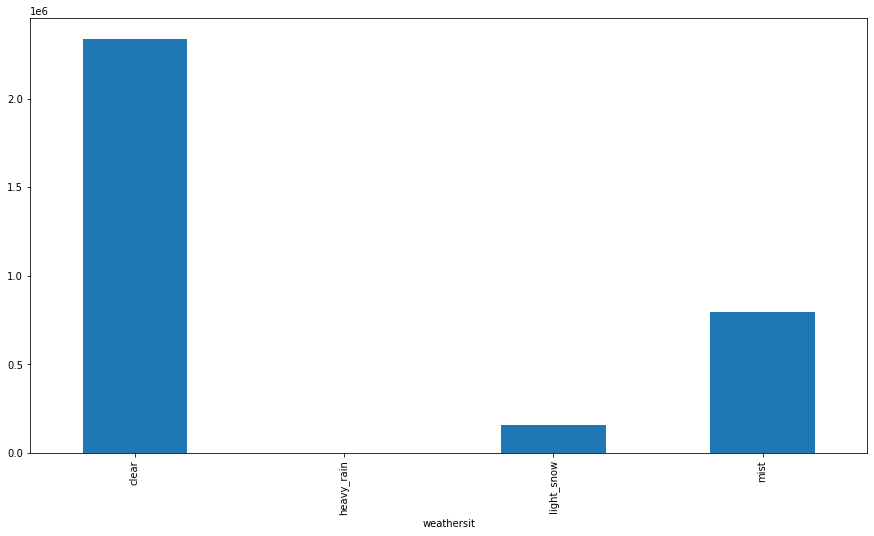

In [14]:
# weather graph
plt.figure(figsize = (15,8))
df_names.groupby('weathersit').cnt.sum().plot(kind='bar');
df_names.groupby('weathersit').cnt.sum().sort_values(ascending=False)

In [15]:
print('Clear weather sees the most bike rentals, followed by mist, light snow, and heavy rain. Each step down is fairly drastic.')

Clear weather sees the most bike rentals, followed by mist, light snow, and heavy rain. Each step down is fairly drastic.


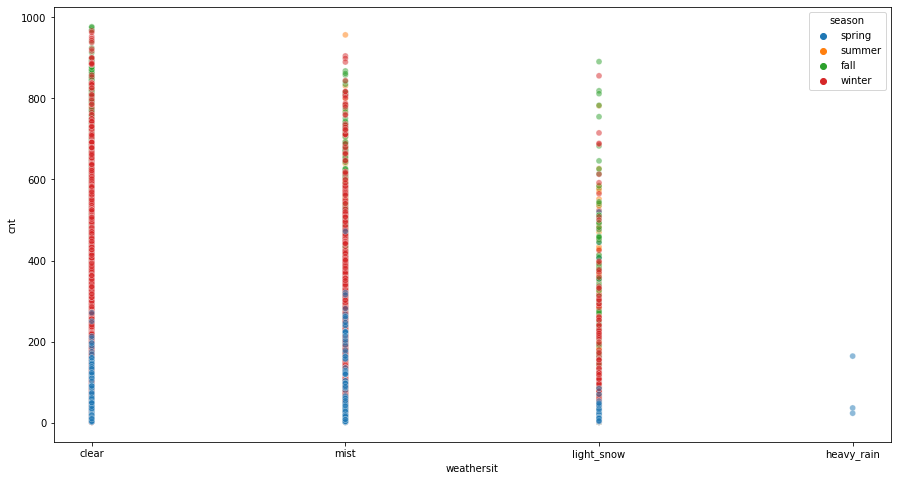

In [16]:
#Implement a point plot of weathersit on the x-axis, count on the y-axis, and
#the season as the hue. Document how season and weathersit are related. # df_names.groupby('weathersit').cnt.sum()
plt.figure(figsize = (15,8))
sns.scatterplot(x=df_names['weathersit'],y=df_names['cnt'], hue=df_names['season'], alpha = .5);

Heavy rain only occurred in spring. There isn't a lot of snow in the summer. There are a lot of clear days in summer. Clear and misty days have a higher distribution on the y-axis.

<AxesSubplot:xlabel='hr', ylabel='cnt'>

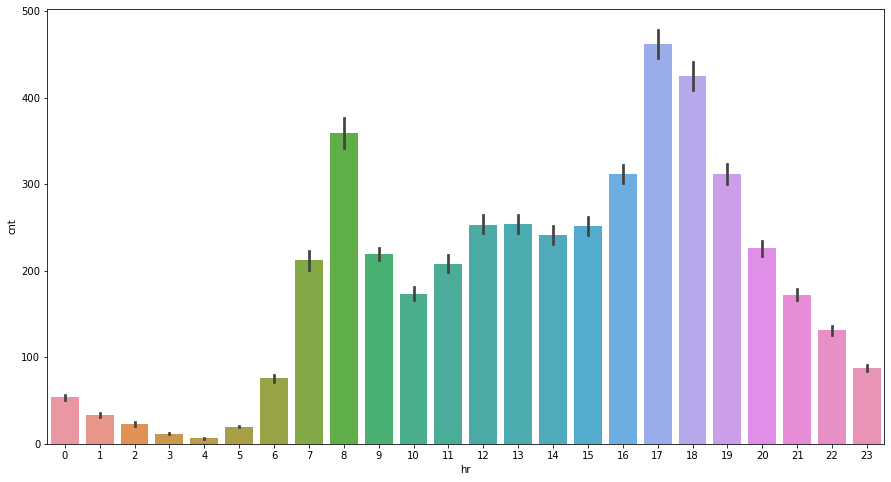

In [17]:
plt.figure(figsize = (15,8))
#df_names.groupby('weathersit').cnt.sum().plot(kind='bar');
sns.barplot(x=df_names['hr'],y=df_names['cnt'])

There are few bike rentals in the late night/early morning, a spike starting in the mid/late morning that levels off until another spike in the early evening. This would be consistent with customers renting bikes for morning commutes to work, evening commutes home, and the assumption that people do not tend to ride bicycles while sleeping.

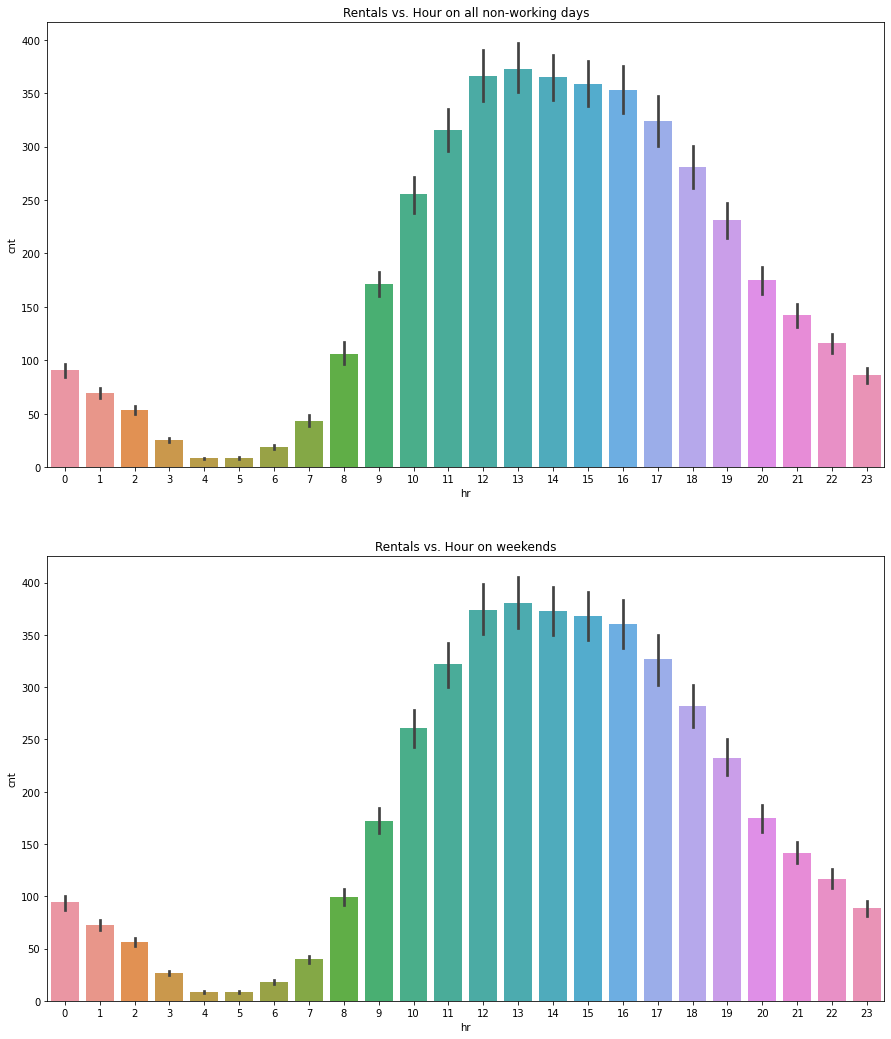

In [18]:
fig, ax = plt.subplots(2, figsize=(15,18))

ax[0].set_title('Rentals vs. Hour on all non-working days')
off = df_names[df_names['workingday']=='no']
sns.barplot(ax=ax[0],x=off['hr'],y=off['cnt'])

ax[1].set_title('Rentals vs. Hour on weekends')
weekend = df_names[df_names['weekday'].isin(['saturday','sunday'])]
sns.barplot(ax=ax[1],x=weekend['hr'],y=weekend['cnt'])

plt.show();

Distribution of bike rental times is much more spread out on non-working days. Presumably because on these days appointments are less regularized, and it is more common for cyclist to ride bicycles recreationally with no set schedule.

# Part 2

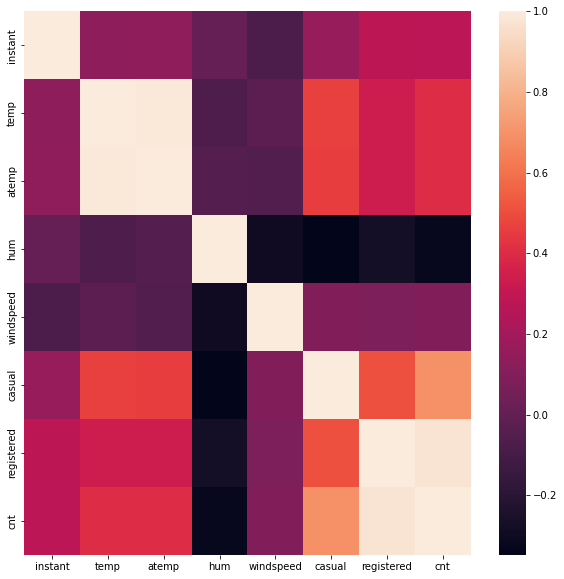

In [19]:
corr=df_names.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr);

Both years had similar humidity and an incredibly similar number of hours. Humidity has a strong negative relationship with rentals in general, but it has less correlation with use by registered users. Higher temperatures see more riders, with a greater seeming effect on casual/recreational riders. Windspeed has a negative relationship with humidity and temperature, but does not on its own appear to relate to rentals. Hour of the day has a signficant correlation with overall ridership, particularly with registered users. I would guess this corresponds to registered users biking to and from work at set times.

In [20]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [21]:
# Data prep
#numeric_cols = df_names.columns[df_names.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
numeric_cols = ['temp','atemp','hum','windspeed','casual','registered','cnt']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df_names[numeric_cols])
df.drop(['casual','registered','dteday','instant'], axis=1, inplace=True)
df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,-1.334648,-1.093281,0.947372,-1.553889,-0.956339
1,1,0,1,1,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,-0.824022
2,1,0,1,2,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,-0.868128
3,1,0,1,3,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,-0.972879
4,1,0,1,4,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,-1.039037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,-1.230779,-1.269602,-0.141137,-0.211691,-0.388478
17375,1,1,12,20,0,1,1,2,-1.230779,-1.269602,-0.141137,-0.211691,-0.553875
17376,1,1,12,21,0,1,1,1,-1.230779,-1.269602,-0.141137,-0.211691,-0.548361
17377,1,1,12,22,0,1,1,1,-1.230779,-1.181732,-0.348473,-0.456099,-0.708245


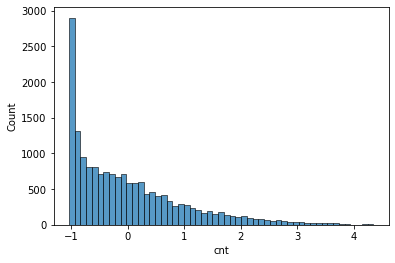

In [22]:
# Rental count histogram
sns.histplot(df['cnt']);

The count of rentals is very left-skewed with most days seeing far fewer than the median number of rentals

In [23]:
# Train test split
X = df.drop(['cnt'], axis=1)
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, \
  test_size=0.33, random_state=0)

In [24]:
# Baseline OLS regression
linear = LinearRegression()
linear.fit(X_train,y_train)
# Predictions
y_pred = linear.predict(X_test)

In [25]:
# Model scores
scores = cross_val_score(linear, X, y, scoring='neg_mean_absolute_error',
                         n_jobs=-1)
print('Model scores for unaltered OLS regression model')
print('MSE: ', mean(absolute(scores)))
print('RMSE: ', sqrt(mean(absolute(scores))))
print('r^2: ', r2_score(y_test, y_pred))

Model scores for unaltered OLS regression model
MSE:  0.6116977186498594
RMSE:  0.782111065418371
r^2:  0.3963666698105811


In [26]:
X

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,-1.334648,-1.093281,0.947372,-1.553889
1,1,0,1,1,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889
2,1,0,1,2,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889
3,1,0,1,3,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889
4,1,0,1,4,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,-1.230779,-1.269602,-0.141137,-0.211691
17375,1,1,12,20,0,1,1,2,-1.230779,-1.269602,-0.141137,-0.211691
17376,1,1,12,21,0,1,1,1,-1.230779,-1.269602,-0.141137,-0.211691
17377,1,1,12,22,0,1,1,1,-1.230779,-1.181732,-0.348473,-0.456099


# Part 3

In [27]:
# one-hot-encoding
df = pd.get_dummies(df, drop_first=True)

In [28]:
df.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_2', 'season_3',
       'season_4', 'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_1',
       'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_1', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'workingday_1', 'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

In [29]:
# New train test split
X = df.drop(['cnt'], axis=1)
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, \
  test_size=0.33, random_state=0)

In [30]:
# Baseline OLS regression
dummy_linear = LinearRegression()
dummy_linear.fit(X_train,y_train)
# Predictions
y_pred = dummy_linear.predict(X_test)

In [31]:
# Model scores
scores = cross_val_score(dummy_linear, X_test, y_test, scoring='neg_mean_absolute_error',
                         n_jobs=-1)
print('Model scores for unaltered OLS regression model')
print('MSE: ', mean(absolute(scores)))
print('RMSE: ', sqrt(mean(absolute(scores))))
print('r^2: ', r2_score(y_test, y_pred))

Model scores for unaltered OLS regression model
MSE:  0.4197652866852704
RMSE:  0.6478929592805207
r^2:  0.6803041547102933


In [32]:
'''o Implement and score a decision tree regressor with random_state=0.
o Implement and score a RandomForestRegressor with random_state=0
and n_esitmators=30.
o Implement and score an SGDRegressor with max_iter=1000 and tol=1e3).
o Implement and score a Lasso Regressor with alpha=0.1.
o Implement and score an ElasticNet Regressor with random_state=0.
o Implement and score a Ridge Regressor with ''';

In [33]:
# Decision Tree Model
DT_reg = DecisionTreeRegressor(random_state=0)
DT_reg.fit(X_train, y_train)
print("CROSS VAL SCORES FOLLOW:")
DTscores = cross_val_score(DT_reg, X_train, y_train, \
  scoring="neg_mean_squared_error", cv=10)  
DTresults = np.sqrt(-DTscores)
y_pred = DT_reg.predict(X_test)
print(f'DT RMSE is {DTresults.mean():.4f}% with std={DTresults.std():.4f}') 
print('r^2: ', r2_score(y_test, y_pred))

CROSS VAL SCORES FOLLOW:
DT RMSE is 0.4391% with std=0.0234
r^2:  0.8133053637209499


In [34]:
# Random Forest Model
RF_reg = RandomForestRegressor(random_state=0, n_estimators = 30)
RF_reg.fit(X_train, y_train)
RFscores = cross_val_score(RF_reg, X_train, y_train, \
  scoring="neg_mean_squared_error", cv=10)
RFresults = np.sqrt(-RFscores)
y_pred = RF_reg.predict(X_test)
print(f'RF RMSE is {RFresults.mean():.4f}% with std={RFresults.std():.4f}') 
print('r^2: ', r2_score(y_test, y_pred))

RF RMSE is 0.3139% with std=0.0097
r^2:  0.9048094568343179


In [35]:
# SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=.001)
sgd_reg.fit(X_train,y_train)
scores = cross_val_score(sgd_reg, X_train, y_train, scoring='neg_mean_absolute_error',
                         n_jobs=-1)
sgd_results = np.sqrt(-scores)
y_pred = sgd_reg.predict(X_test)
print(f'SGD RMSE is {sgd_results.mean():.4f}% with std={sgd_results.std():.4f}') 
print('r^2: ', r2_score(y_test, y_pred))

SGD RMSE is 0.6547% with std=0.0052
r^2:  0.6661482914603141


In [36]:
# Lasso regression
lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(X_train,y_train)
scores = cross_val_score(lasso_reg, X_train, y_train, scoring='neg_mean_absolute_error',
                         n_jobs=-1)
lasso_results = np.sqrt(-scores)
y_pred = lasso_reg.predict(X_test)
print(f'Lasso RMSE is {lasso_results.mean():.4f}% with std={lasso_results.std():.4f}') 
print('r^2: ', r2_score(y_test, y_pred))

Lasso RMSE is 0.8128% with std=0.0078
r^2:  0.24760189453449621


In [37]:
# Elastic Net regression
net_reg = ElasticNet(random_state=0)
net_reg.fit(X_train,y_train)
scores = cross_val_score(net_reg, X_train, y_train, scoring='neg_mean_absolute_error',
                         n_jobs=-1)
net_results = np.sqrt(-scores)
y_pred = net_reg.predict(X_test)
print(f'Net RMSE is {net_results.mean():.4f}% with std={net_results.std():.4f}') 
print('r^2: ', r2_score(y_test, y_pred))

Net RMSE is 0.8866% with std=0.0052
r^2:  -2.2832936630301504e-07


In [38]:
# Ridge regression 
ridge_reg = Ridge(alpha=.5)
ridge_reg.fit(X_train,y_train)
scores = cross_val_score(ridge_reg, X_train, y_train, scoring='neg_mean_absolute_error',
                         n_jobs=-1)
ridge_results = np.sqrt(-scores)
y_pred = ridge_reg.predict(X_test)
print(f'Net RMSE is {ridge_results.mean():.4f}% with std={ridge_results.std():.4f}') 
print('r^2: ', r2_score(y_test, y_pred))

Net RMSE is 0.6444% with std=0.0050
r^2:  0.680366949727264


In [39]:
# Bagging regression
from sklearn.ensemble import BaggingRegressor
#from sklearn.svm import SVR
bag_reg = BaggingRegressor(random_state=0)
bag_reg.fit(X_train,y_train)
bag_scores = cross_val_score(bag_reg, X_train, y_train, scoring='neg_mean_absolute_error',
                         n_jobs=-1)
bag_results = np.sqrt(-scores)
y_pred = bag_reg.predict(X_test)
print(f'Bagging RMSE is {bag_results.mean():.4f}% with std={bag_results.std():.4f}') 
print('r^2: ', r2_score(y_test, y_pred))

Bagging RMSE is 0.6444% with std=0.0050
r^2:  0.8955089944700373


# Part 4

In [40]:
# I already did cross validation before reading this step, so: 
print(f'DT RMSE is {DTresults.mean():.4f}% with std={DTresults.std():.4f}') 
print(f'RF RMSE is {RFresults.mean():.4f}% with std={RFresults.std():.4f}') 
print(f'Bagging RMSE is {bag_results.mean():.4f}% with std={bag_results.std():.4f}')

DT RMSE is 0.4391% with std=0.0234
RF RMSE is 0.3139% with std=0.0097
Bagging RMSE is 0.6444% with std=0.0050


In [ ]:
# Random Search
RF2 = RandomForestRegressor(random_state=0, n_estimators = 30)

params = {'bootstrap': [True,False],
          'max_depth': [10*x for x in range(0,12)],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [2,5,10],
          'min_samples_leaf' : [1,2,4],
          'n_estimators' : [200*(x+1) for x in range(0,10)]
          # 200 – 2000, number of bins 10 ?????
}
#search_cv = RandomizedSearchCV(RF2, params, n_jobs=5)
clf = RandomizedSearchCV(RF2, params, n_jobs=5)
search = clf.fit(X_train, y_train)

In [ ]:
search.best_params_

In [ ]:
RF_reg = RandomForestRegressor(n_estimators=800, min_samples_split=2, min_samples_leaf=1,
                               max_features='auto', max_depth=80, bootstrap=True)

In [ ]:
# Random Forest Model
#RF_reg = RandomForestRegressor(random_state=0, n_estimators = 30)
RF_reg.fit(X_train, y_train)
RFscores = cross_val_score(RF_reg, X_train, y_train, \
  scoring="neg_mean_squared_error", cv=10)
RFresults = np.sqrt(-RFscores)
y_pred = RF_reg.predict(X_test)
print(f'RF RMSE is {RFresults.mean():.4f}% with std={RFresults.std():.4f}') 
print('r^2: ', r2_score(y_test, y_pred))